In [11]:
# import tensorflow as ts
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 美颜

In [2]:
img1 = cv2.imread('H:\Jupyter\img1.jpg',1)
dst = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
cv2.imshow('dd',dst)
cv2.waitKey()

-1

# 直方图

In [5]:
def ImageHist(image,type):
    color(255,255,255)
    windowName = 'Gray'
    if type == 31:
        color = (255,0)
        windowName = 'B hist'
    elif type == 32:
        color = (0,255,0)
        windowName = 'G hist'
    elif type == 33:
        color = (0,0,255)
        windowName = 'R hist'
    hist = cv2.calcHist([image],[0],None,[256],[0.0,255.0])
    min,max,minI,maxI = cv2.minMaxLoc(hist)
    histImg = np.zeros([256,256,3],np.uint8)
    for i in range(256):
        intenNormal = int(hist[i]*256/maxI) #归一化
        cv2.line(histImg,(i,256),(i,256-intenNormal),clolor)
    cv2.imshow(windowName,histImg)
    return histImg
img = cv2.imread('img1.jpg',1)
channels = cv2.split(img) #RGB R G B
for i in range(0,3):
    ImageHist(channels,histImg[i],31+i)
cv2.waitKey(0)

NameError: name 'histImg' is not defined

In [6]:
#灰色图片均衡化
img = cv2.imread('H:\Jupyter\img1.jpg',1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('src',gray)
dst = cv2.equalizeHist(gray)
cv2.imshow('dsd',dst)
cv2.waitKey(0)

-1

In [8]:
#彩色图片均衡化
img = cv2.imread('H:\Jupyter\img1.jpg',1)
(b,g,r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
result = cv2.merge((bH,gH,rH))  #通道合成
cv2.imshow('dsd',result)
cv2.waitKey(0)

-1

In [ ]:
#YUV图片均衡化
img = cv2.imread('H:\Jupyter\img1.jpg',1)
imgYUV = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
channleYUV = cv2.split(imgYUV)
channleYUV[0] = cv2.equalizeHist(channleYUV[0])
channles = cv2.merge(channleYUV)
result = cv2.cvtColor(channels,cv2.COLOR_YCrCb2BGR)
cv2.imshow('dsd',result)
cv2.waitKey(0)

# 图片修复

In [6]:
for i in range(200,300):
    img1[i,200] = (255,255,255)
    img1[i,200+1] = (255,255,255)
    img1[i,200-1] = (255,255,255)
for i in range(150,250):
    img1[250,i] = (255,255,255)
    img1[250,i+1] = (255,255,255)
    img1[250,i-1] = (255,255,255)
cv2.imwrite('dd.jpg',img1)
cv2.imshow('aa',img1)
cv2.waitKey(0)

-1

In [10]:
img = cv2.imread('dd.jpg',1)
cv2.imshow('sree',img)
cv2.waitKey(0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
paint = np.zeros((height,width,1),np.uint8)
for i in range(200,300):
    paint[i,200] = 255
    paint[i,200+1] = 255
    paint[i,200-1] = 255
for i in range(150,250):
    paint[250,i] = 255
    paint[250,i+1] = 255
    paint[250,i-1] = 255

cv2.imshow('aa',paint)
imgDst = cv2.inpaint(img,paint,3,cv2.INPAINT_TELEA)
cv2.imshow('aa',imgDst)
cv2.waitKey(0)

-1

# 灰度直方图

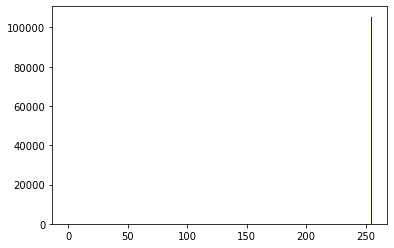

-1

In [13]:
img = cv2.imread('dd.jpg',1)
cv2.imshow('sree',img)
cv2.waitKey(0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,255):
    count[i] = count[i] / (height*width)
x = np.linspace(0,255,256)
y = count
plt.bar(x,y,0.9,alpha=1,color='b')
plt.show()
cv2.waitKey(0)

# 灰度直方图均衡化

In [16]:
'''
本质；统计每个像素灰度出现的概率
累计概率
1  0.2  0.2
2  0.3  0.5
3  0.1  0.6
256
100  0.5  255*0.5 = new
'''
img = cv2.imread('dd.jpg',1)
cv2.imshow('sree',img)
cv2.waitKey(0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,255):
    count[i] = count[i] / (height*width)
    
#累计概率
sum1 = float(0)
for i in range(0,256):
    sum1 = sum1+count[i]
    count[i] = sum
# print(count)
# 计算映射表
map1 = np.zeros(256,np.uint16)
for i in range(0,256):
    map1[i] = np.uint16(count[i]*255)
# 映射
for i in range(0,height):
    for j in  range(0,width):
        pixel = gray[i,j]
        gray[i,j] = map1[pixel]
cv2.imshow('ds',gray)
cv2.waitKey(0)

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'